In [1]:
# Import Libraries

import requests
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import pi
import random

In [2]:
# Gather Cat API data

cats = requests.get("https://api.thecatapi.com/v1/breeds").json() # import data as JSON file
cat = pd.DataFrame(cats) # convert to data frame

# fix formatting of column names
fix =  [cat.columns[i].replace("_", ' ') for i in range(0,len(cat.columns))]
cat.columns = fix

# description data to be used for fancy charting
# for catone, ignoring: hairless, indoor
catinfo = cat.loc[:,['name','temperament', 'image','country code', 'alt names', 'description']].set_index('name')
catone = cat.loc[:, ['name',  'short legs','hypoallergenic','suppressed tail', 'lap', 'hairless', 'natural']].set_index('name')


# dropping adaptability, affection_level due to lack of spread and to reduce clutter
# dropping bidability and cat_friendly due to lack of data
# consider keeping: weight, life span
cat = cat.drop(columns = [ 'bidability', 'cat friendly', 'adaptability', 'affection level',
        'weight', 'temperament', 'origin', 'life span',
        'id','cfa url','vetstreet url', 'vcahospitals url', 'lap', 'experimental',
        'country codes', 'country code', 'description', 'natural', 'rex', 'suppressed tail',
        'alt names', 'indoor', 'hairless', 'rare', 'short legs','hypoallergenic',
        'wikipedia url',  'reference image id', 'image',])
cat = cat.set_index('name')

# extract means for background shading
attributes = cat.columns
cat.loc['mean',attributes] = [round(np.mean(cat[attributes[i]])) for i in range(len(attributes))]
means = np.asarray(cat.loc['mean',:])
means2 = np.append(means, means[0]) # repeat first value to close circle

# angles for each category, reduce amount of categories if it looks cluttered
# calculates position/portion of perimeter (2*pi*r, where r = 1) for each category
angles = [x / len(means) * 2 * pi for x in range(len(means))]
angles2 = np.append(angles, angles[0]) # again, append last values to close circle


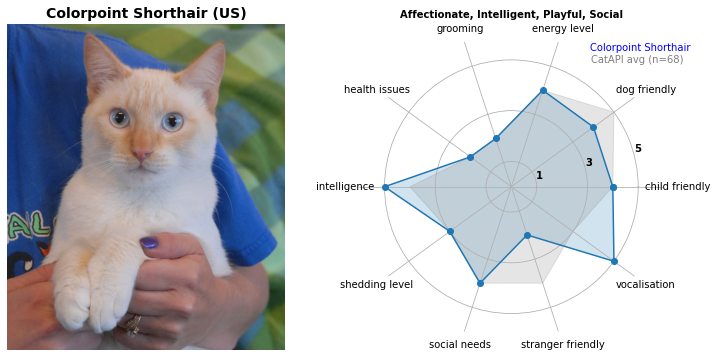

Colorpoint Shorthairs are an affectionate breed, devoted and loyal to their people. Sensitive to their owner’s moods, Colorpoints are more than happy to sit at your side or on your lap and purr words of encouragement on a bad day. They will constantly seek out your lap whenever it is open and in the moments when your lap is preoccupied they will stretch out in sunny spots on the ground.

•  lap


In [4]:
# Sample random cat, 
# generate plots, image, description

sample = random.randrange(0,len(cat)-1,1)
values = np.asarray(cat.iloc[sample,:])
values2 = np.append(values, values[0])
samplename = cat.index[sample]

if (catinfo.loc[samplename, 'alt names']) == '' or pd.isnull(catinfo.loc[samplename, 'alt names']):
    AKAtext = ''
else:
    AKAtext = 'AKA: ' + catinfo.loc[samplename, 'alt names']


# define figure and axes
fig = plt.figure(figsize = (12,6))

# Image
ax1 = plt.subplot(121)
plt.plot()
ax1.axis('off')

if catinfo.loc[samplename, 'image'] == {} or pd.isna(catinfo.loc[samplename, 'image']):
    disclaimer = 'No image for ' + samplename
    plt.title(disclaimer)
    plt.text(-.05, 0.03, AKAtext)
else:
    sampleimg = Image.open(requests.get(catinfo.loc[samplename, 'image']['url'], stream=True).raw)
    plt.imshow(sampleimg)
    imgtitle = samplename + ' (' + catinfo.loc[samplename, 'country code'] + ')'
    plt.title(imgtitle, fontsize = 14, fontweight = 'heavy')
    x,y = sampleimg.size
    plt.text(0-x/20, y+y/8, AKAtext)







# Radar Plot
ax = plt.subplot(122, polar = "True")
ax.spines['polar'].set_visible(False)

# plot sample data over mean as background
plt.polar(angles2,values2, marker = 'o') # sample dots
plt.fill(angles2,values2,alpha = 0.2) # sample fill
plt.fill(angles2,means2,alpha = 0.2, color = 'grey') # mean background fill

# ticks
plt.xticks(angles,attributes, color = 'black') # changes lines to match up with number of values, adds label to each one
ax.set_rlabel_position(15)
plt.yticks([1,3,5], fontweight = 'bold') # reduce y ticks an labels
plt.ylim(0,6)

plt.title(catinfo.loc[samplename,'temperament'], fontweight = 'bold', fontsize = 10)
catcount = 'CatAPI avg (n=' + str(len(cat)) + ')'
plt.text(1,5.8,catcount, color = 'grey')
plt.text(1.05,6.2,samplename,color = 'blue')
plt.show()
print(catinfo.loc[samplename,'description'])
print()

checks = catone.loc[samplename,:]
checkprint = checks[checks>0]
for x in range(len(checkprint)):
    print('• ', checkprint.index[x])